In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [279]:
#Load exogenous prime rate data history

def scrape_prime():
    url = 'http://www.fedprimerate.com/wall_street_journal_prime_rate_history.htm'
    page = requests.get(url)
    soup=BeautifulSoup(page.content,"html")
    rows = soup.find_all(class_='p-1-b-c') #find all rows
    rlist = []
    for i in rows[402:524]:
         rlist.append(i.get_text())
    date = []
    rate = []
    for k,v in enumerate(rlist):
        if k % 2 == 0:
            rate.append(v)
        else:
            date.append(v)
    df_dict = {'date':date,
               'rate':rate}
    df = pd.DataFrame.from_dict(df_dict)
    return df

In [280]:
prime_rate_df = scrape_prime()
prime_rate_df 

,date,rate
0,"September \n 30, 1998",8.50
1,"October \n 16, 1998",8.25
2,"November \n 18, 1998",8.00
3,"July \n 1, 1999",7.75
4,"August \n 25, 1999",8.00
...,...,...
56,"June \n 14, 2018",4.75
57,"September 27, 2018",5.00
58,"December \n 20, 2018",5.25
59,"July \n 31, 2019",5.50


In [281]:
prime_rate_df = prime_rate_df.shift(-1)

In [282]:
prime_rate_df.dropna(inplace = True)

In [283]:
prime_rate_df = prime_rate_df.iloc[::-1]

In [284]:
prime_rate_df.date = prime_rate_df.date.str.replace('\n ', ' ', regex=False)

In [285]:
prime_rate_df.iloc[54][1] = 4.75

In [286]:
prime_rate_df.set_value(54, 'rate', 4.75)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,date,rate
59,"September 18, 2019",5.25
58,"July 31, 2019",5.50
57,"December 20, 2018",5.25
56,"September 27, 2018",5.00
55,"June 14, 2018",4.75
54,"March 22, 2018",4.75
53,Date of Rate Change,4.50
52,"December 14, 2017",4.25
51,"June 15, 2017",4.00
50,"March 16, 2017",3.75


In [287]:
prime_rate_df.drop(53, inplace = True)

In [288]:
prime_rate_df.date = pd.to_datetime(prime_rate_df.date)

In [289]:
prime_rate_df.reset_index(inplace=True)
prime_rate_df.drop(columns=['index'], inplace=True)

In [290]:
prime_rate_df.set_index('date')

,rate
date,
2019-09-18,5.25
2019-07-31,5.50
2018-12-20,5.25
2018-09-27,5.00
2018-06-14,4.75
2018-03-22,4.75
2017-12-14,4.25
2017-06-15,4.00
2017-03-16,3.75


In [291]:
prime_rate_df.to_csv('prime_lending_rates.csv')

In [296]:
prime_rate_df['rate'] = prime_rate_df.rate.astype('float64')

In [297]:
prime_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
date    59 non-null datetime64[ns]
rate    59 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


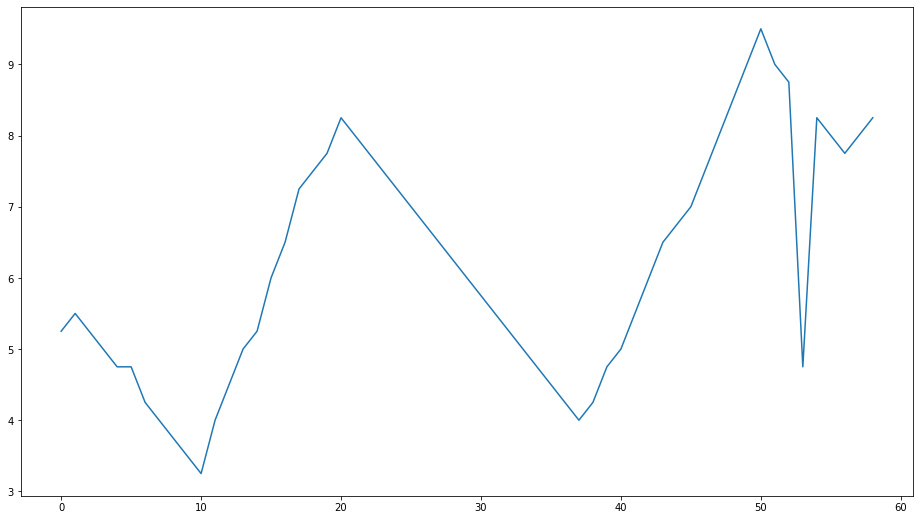

In [305]:
fig = plt.figure(figsize = (16,9))
plt.plot(prime_rate_df.rate)